# 1. LDA / QDA

In [101]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [102]:
# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index=0):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')


plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)

def plot_sep(lda, X, y, y_pred):
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

<Figure size 720x576 with 0 Axes>

## Create and load Data

In [103]:
# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

LDA_data = dataset_fixed_cov()
QDA_data = dataset_cov()

### LDA Data

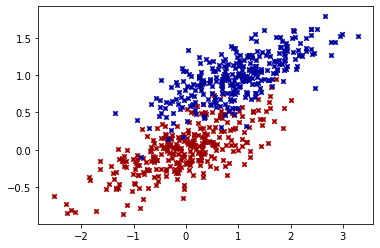

In [104]:
y_0 = LDA_data[1][LDA_data[1] == 0]
X_0 = LDA_data[0][LDA_data[1] == 0]

plt.scatter(X_0[:, 0], X_0[:, 1], marker='.', color='red')
plt.scatter(X_0[:, 0], X_0[:, 1], marker='x', s=20, color='#990000')

y_1 = LDA_data[1][LDA_data[1] == 1]
X_1 = LDA_data[0][LDA_data[1] == 1]

plt.scatter(X_1[:, 0], X_1[:, 1], marker='.', color='blue')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=20, color='#000099')

### QDA Data

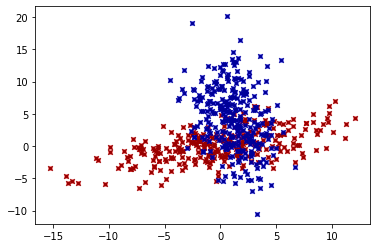

In [105]:
y_0 = QDA_data[1][QDA_data[1] == 0]
X_0 = QDA_data[0][QDA_data[1] == 0]

plt.scatter(X_0[:, 0], X_0[:, 1], marker='.', color='red')
plt.scatter(X_0[:, 0], X_0[:, 1], marker='x', s=20, color='#990000')

y_1 = QDA_data[1][QDA_data[1] == 1]
X_1 = QDA_data[0][QDA_data[1] == 1]

plt.scatter(X_1[:, 0], X_1[:, 1], marker='.', color='blue')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=20, color='#000099')

In [106]:
# Step0. Load data
X = LDA_data[0]
y = LDA_data[1]

# Step1. Import classifier model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step2. Instantiate a model by specifying model hyperparameters
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)

# Step3. Train / fit the model to the data
lda.fit(X, y)

# Step4. Make prediction
lda.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [107]:
# Step5. (Test model) compute performance score on data
lda.score(X, y)

0.9416666666666667

(-2.8192269094900317,
 3.581192918644006,
 -0.988703625549599,
 1.9187274256945348)

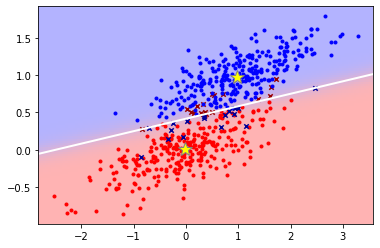

In [108]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
plot_sep(lda, X, y, y_pred)
plt.axis('tight')

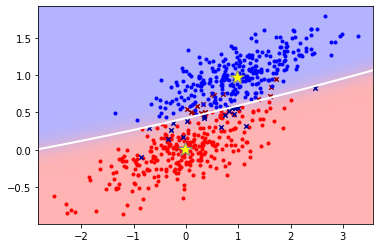

In [110]:
# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y).predict(X)
plot_sep(qda, X, y, y_pred)

## Comparison

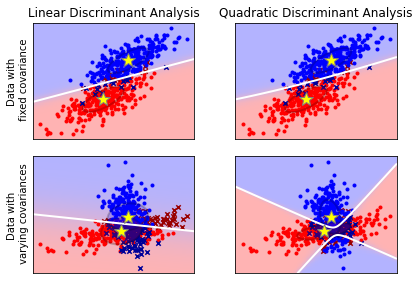

In [111]:
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')
    
    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# 2. Logistic Regression

## 2-1) Basic Model (Breast Cancer Data)

In [112]:
import sklearn.datasets
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
data.target[[10, 50, 85]]

array([0, 1, 0])

In [113]:
list(data.target_names)

['malignant', 'benign']

In [114]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
lr.score(X, y)

0.9595782073813708

In [116]:
lr.predict_proba(X[:1])

array([[1.00000000e+00, 2.62841744e-15]])

In [117]:
y[0]

0

## 2-2) How LR makes predictions

In [118]:
# === Dot product === #
x = np.arange(3)
y = np.arange(3,6)
print(x)
print(y)
print(np.sum(x*y))
print(x@y)

[0 1 2]
[3 4 5]
14
14


In [123]:
data = load_breast_cancer()
X = data.data
y = data.target

lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
print(lr.predict(X)[10])
print(lr.predict(X)[20])

0
1


### Compute raw model output

In [120]:
lr.coef_ @ X[10] + lr.intercept_

array([-6.03940792])

In [121]:
lr.coef_ @ X[20] + lr.intercept_

array([5.20702942])

#### How does regularization affect training accuracy?

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=17, stratify=y)

In [125]:
lr_weak_reg = LogisticRegression(solver='liblinear', C=1000)
lr_strong_reg = LogisticRegression(solver='liblinear', C=0.001)

In [126]:
lr_weak_reg.fit(X_train, y_train)
lr_strong_reg.fit(X_train, y_train)

print(lr_weak_reg.score(X_train, y_train))
print(lr_strong_reg.score(X_train, y_train))

0.9723618090452262
0.9296482412060302


#### How does regularization affect test accuracy?

In [127]:
print(lr_weak_reg.score(X_test, y_test))
print(lr_strong_reg.score(X_test, y_test))

0.9707602339181286
0.9298245614035088


### Hyperparameter search

In [128]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='liblinear')    # penalty='l1'

# run grid search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]}, cv=5)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
#best_lr = searcher.best_estimator_
#coefs = best_lr.coef_
#print("Total number of features:", coefs.size)
#print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 10}


# 3. Support Vector Machine

### Only support vectors matter

In [129]:
# Step0. Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Step1. Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123, stratify=y)

# Step2. Instantiate a model by specifying model hyperparameters
from sklearn.svm import SVC
svm = SVC(kernel="linear")

# Step3. Train / fit the model to the data
svm.fit(X_train, y_train)

# Step4. Score performance / Make prediction
svm.score(X_test, y_test)

0.9532163742690059

In [130]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X_train[svm.support_]
y_small = y_train[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)

Number of original examples 569
Number of support vectors 43


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [131]:
svm_small.score(X_test, y_test)

0.9532163742690059

### Kernel SVM

In [132]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 10], 'gamma':[0.01, 0.1], 'kernel': ['linear', 'rbf']}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best CV accuracy 0.9572784810126581
Test accuracy of best grid search hypers: 0.9649122807017544


### Logistic Regression(Log loss) vs. SVM(Hinge loss)

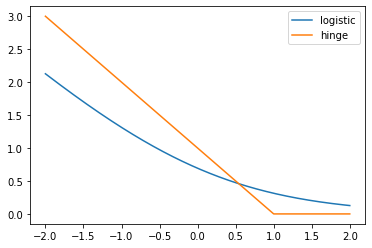

In [133]:
# logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
    return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()

In [134]:
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 1e-05, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.9121794871794873
Test accuracy of best grid search hypers: 0.9239766081871345


# 4. Perceptron

In [135]:
input_data = np.array([2, 3])
weights = {'node_0': np.array([1,1]),
           'node_1': np.array([-1,1]),
           'output': np.array([2,-1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

# Forward propagation
hidden_layer_values = np.array([node_0_value, node_1_value])
print(hidden_layer_values)

[5 1]


In [136]:
output = (hidden_layer_values * weights['output']).sum()
print(output)

9


### Activation functions

In [137]:
#=== ReLU === #
def relu(input):
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output
model_output = (hidden_layer_outputs * weights['output']).sum()
print(model_output)

9


### Feedforward Network

In [138]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

input_data = [np.array([3,5]), np.array([1,-1]), np.array([0,0]), np.array([8,4])]
weights = {'node_0': np.array([1,1]),
           'node_1': np.array([-1,1]),
           'output': np.array([2,-1])}

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[14, 0, 0, 24]


### MSE loss

In [139]:
from sklearn.metrics import mean_squared_error

weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}
target_actuals = [1,3,5,7]
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


### Update weights and improving loss

#### Single data point example

In [140]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

learning_rate = 0.01

preds = (weights * input_data).sum()
error = preds - target

gradient = 2 * error * input_data / 1

# Update the weights
weights_updated = weights - learning_rate * gradient

# Get updated predictions
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


### Deeper Network

In [141]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

weights = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}
input_data = np.array([3,5])

output = predict_with_network(input_data)
print(output)


182


### Gradient descent

In [142]:
def get_mse(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = np.mean((preds - target)**2)
    mse = error
    return mse

def get_slope(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    mse = error
    slope = 2 * mse * input_data
    return slope

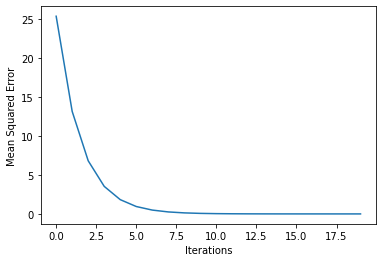

In [143]:
input_data = np.array([1,2,3])
weights = np.array([0,2,1])
target=0

n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Keras

In [144]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

data = load_breast_cancer()
predictors = np.array(data.data, dtype='float64')
# Convert the target to categorical: target (One-hot encoding)
target = to_categorical(np.array(data.target, dtype='float64'))

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(2, activation='softmax'))

In [145]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(predictors, target)

18/18 [==============================] - 0s 1ms/step - loss: 4.9939 - accuracy: 0.5636


In [146]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 66        
Total params: 2,114
Trainable params: 2,114
Non-trainable params: 0
_________________________________________________________________


### Validation

In [147]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

data = load_breast_cancer()
predictors = np.array(data.data, dtype='float64')
# Convert the target to categorical: target (One-hot encoding)
target = to_categorical(np.array(data.target, dtype='float64'))

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(2, activation='softmax'))

In [148]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 [==============================] - 1s 15ms/step - loss: 57.6418 - accuracy: 0.3895 - val_loss: 7.0208 - val_accuracy: 0.7456
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 9.7084 - accuracy: 0.5233 - val_loss: 2.4363 - val_accuracy: 0.7719
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 4.4154 - accuracy: 0.6306 - val_loss: 2.9303 - val_accuracy: 0.6842
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 3.1018 - accuracy: 0.6779 - val_loss: 2.4421 - val_accuracy: 0.7368
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 2.4126 - accuracy: 0.7151 - val_loss: 0.9676 - val_accuracy: 0.8860
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.2577 - accuracy: 0.8391 - val_loss: 0.9420 - val_accuracy: 0.8772
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.8989 - accuracy: 0.8710 - val_loss: 0.9297 - val_accuracy: 0.9035
Epoch 8/20
15/15 [

### Prediction & Optimizer selection

In [149]:
data = load_breast_cancer()
predictors = np.array(data.data, dtype='float64')
# Convert the target to categorical: target (One-hot encoding)
target = to_categorical(np.array(data.target, dtype='float64'))

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3,random_state=123, stratify=y)

In [150]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(2, activation='softmax'))

In [151]:
from keras.optimizers import SGD

optim = SGD(lr=0.001)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
10/10 [==============================] - 1s 23ms/step - loss: 74.2990 - accuracy: 0.4903 - val_loss: 6.3535 - val_accuracy: 0.3000
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 3.2491 - accuracy: 0.4695 - val_loss: 0.5152 - val_accuracy: 0.7875
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 0.8119 - accuracy: 0.6368 - val_loss: 0.5103 - val_accuracy: 0.7125
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.4230 - accuracy: 0.8595 - val_loss: 0.3981 - val_accuracy: 0.8000
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6393 - accuracy: 0.7088 - val_loss: 0.2631 - val_accuracy: 0.9375
Epoch 6/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6073 - accuracy: 0.7656 - val_loss: 0.4059 - val_accuracy: 0.7875
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.8923 - accuracy: 0.5862 - val_loss: 0.4405 - val_accuracy: 0.8250
Epoch 8/20
10/10 [

In [152]:
# Calculate predictions: predictions
predictions = model.predict(X_test)

# print predicted_prob_true
print(predictions[0], y_test[0])

[0.07084129 0.9291587 ] [0. 1.]


### Early Stopping

In [153]:
data = load_breast_cancer()
predictors = np.array(data.data, dtype='float64')
# Convert the target to categorical: target (One-hot encoding)
target = to_categorical(np.array(data.target, dtype='float64'))

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3,random_state=123, stratify=y)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(2, activation='softmax'))

In [156]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping_monitor])

Epoch 1/1000
10/10 [==============================] - 1s 23ms/step - loss: 1.3716 - accuracy: 0.7773 - val_loss: 1.8402 - val_accuracy: 0.5875
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.2001 - accuracy: 0.7700 - val_loss: 0.5923 - val_accuracy: 0.9375
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4913 - accuracy: 0.8756 - val_loss: 0.7060 - val_accuracy: 0.9500
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5571 - accuracy: 0.8813 - val_loss: 0.4972 - val_accuracy: 0.9375
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3212 - accuracy: 0.9051 - val_loss: 0.5805 - val_accuracy: 0.9500
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5022 - accuracy: 0.8668 - val_loss: 0.6394 - val_accuracy: 0.7875


### Comparing Models

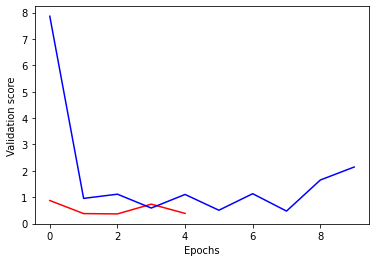

In [157]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


In [158]:
model_1_training.history['val_loss']

[0.8754050731658936,
 0.3793877065181732,
 0.36729276180267334,
 0.7366895079612732,
 0.38656091690063477]

In [159]:
model_2_training.history['val_loss']

[7.860264301300049,
 0.9559539556503296,
 1.114813208580017,
 0.5896802544593811,
 1.1049915552139282,
 0.5070306062698364,
 1.1335753202438354,
 0.47459906339645386,
 1.6528050899505615,
 2.1447670459747314]

### Saving, reloading model

In [160]:
from keras.models import load_model
model.save('model_v1.h5')
model_loaded = load_model('model_v1.h5')
predictions = model_loaded.predict(X_test)
probability_true = predictions[:,1]

In [161]:
probability_true

array([9.99936342e-01, 7.88249731e-01, 1.24344192e-01, 9.94551957e-01,
       1.50673121e-04, 4.84754923e-13, 5.28931778e-05, 9.99056637e-01,
       9.86937463e-01, 9.99670506e-01, 1.15562038e-09, 9.96454477e-01,
       2.63793074e-04, 1.50178522e-07, 8.74888618e-03, 9.99481022e-01,
       6.48621994e-04, 7.52336800e-01, 9.76189137e-01, 8.74401033e-01,
       9.97774422e-01, 9.99929070e-01, 2.02492461e-01, 8.70988727e-01,
       7.94855282e-07, 9.94448423e-01, 9.06236470e-01, 9.99729216e-01,
       9.99361575e-01, 4.55399185e-01, 9.99305606e-01, 7.81333074e-05,
       9.92888927e-01, 9.34658945e-01, 9.97896552e-01, 9.97887552e-01,
       6.67566957e-04, 9.97028530e-01, 9.99790251e-01, 9.99810517e-01,
       9.89168048e-01, 9.91170049e-01, 9.99784052e-01, 9.98925745e-01,
       4.44748463e-18, 9.98774707e-01, 9.99539375e-01, 9.96134162e-01,
       9.67322826e-01, 9.99918342e-01, 9.97510076e-01, 1.38787043e-04,
       9.97298062e-01, 7.58225441e-01, 9.99026418e-01, 9.98858571e-01,
      

### Minimizing a loss

In [ ]:
from scipy.optimize import minimize
minimize(np.square, 0).x    # (objective function, initial value of weights)

array([0.])

In [ ]:
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(X.shape[0]):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0], method='BFGS').x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=10000000, solver='lbfgs').fit(X,y)
print(lr.coef_)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[[ 0.43256471  0.16609862  0.41565465 -0.01727649 -0.01284757 -0.06631519
  -0.09353841 -0.03890338 -0.0179643  -0.00336417  0.01646335  0.14248969
   0.00670284 -0.08906389 -0.00123177 -0.01486839 -0.0204674  -0.00517467
  -0.00442618 -0.00132979  0.45485546 -0.28424992 -0.23239429 -0.01103689
  -0.02408195 -0.21161677 -0.26348522 -0.0759322  -0.05953422 -0.0195087 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
